[*********************100%***********************]  1 of 1 completed


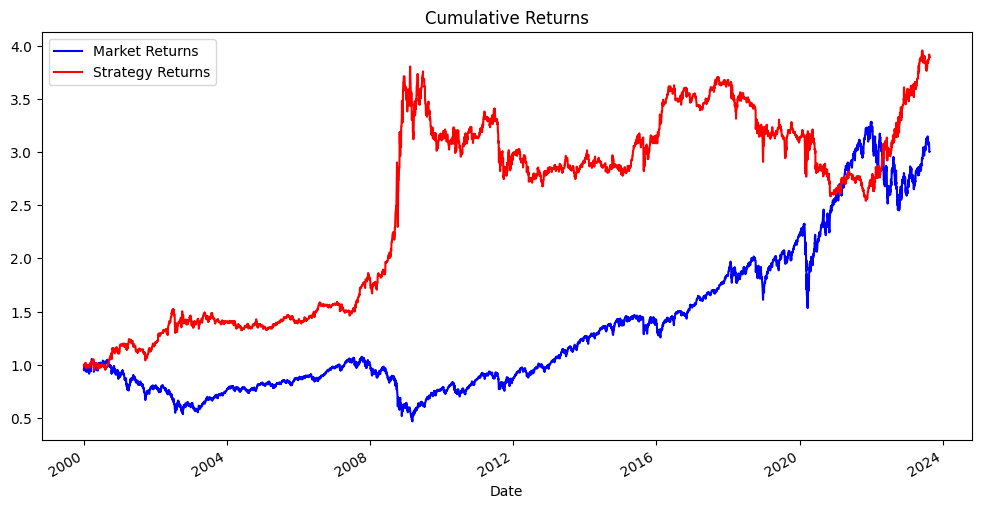

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download SPY data
spy_data = yf.download('SPY', start='2000-01-01')

# Calculate the 2-period RSI
delta = spy_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)

avg_gain = gain.rolling(window=2).mean()
avg_loss = loss.rolling(window=2).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

spy_data['RSI'] = rsi

# Define buy and sell conditions
buy_threshold = 10
sell_threshold = 90

spy_data['Buy_Signal'] = (spy_data['RSI'] < buy_threshold).astype(int)
spy_data['Sell_Signal'] = (spy_data['RSI'] > sell_threshold).astype(int)

# Calculate strategy returns
spy_data['Market_Returns'] = spy_data['Close'].pct_change()
spy_data['Strategy_Returns'] = spy_data['Market_Returns'] * spy_data['Buy_Signal'].shift(1) - spy_data['Market_Returns'] * spy_data['Sell_Signal'].shift(1)

# Calculate cumulative returns
spy_data['Cumulative_Market_Returns'] = (1 + spy_data['Market_Returns']).cumprod()
spy_data['Cumulative_Strategy_Returns'] = (1 + spy_data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(12, 6))
spy_data['Cumulative_Market_Returns'].plot(label='Market Returns', color='blue')
spy_data['Cumulative_Strategy_Returns'].plot(label='Strategy Returns', color='red')
plt.title('Cumulative Returns')
plt.legend()
plt.show()
